#### About
Predicting insurance premiums
> Dataset link - https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

> The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region)

In [25]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/data-science-ml-dl-projects/02-deep-learning/44-lap-gan/insurance.csv')

In [12]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


#### 1. Data pre-processing.

In [13]:
# encoding nominal features
le = LabelEncoder()
df_encoded1 = df
df_encoded1['sex'] = le.fit_transform(df_encoded1['sex'])
df_encoded1['smoker'] = le.fit_transform(df_encoded1['smoker'])
df_encoded1['region'] = le.fit_transform(df_encoded1['region'])


In [14]:
df_encoded1

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [15]:
ohe = OneHotEncoder()
nominal_features = ['sex', 'smoker', 'region']
ohe.fit(df_encoded1[nominal_features])
encoded = ohe.transform(df_encoded1[nominal_features]).toarray()
df_encoded2 = pd.concat([df_encoded1.drop(nominal_features, axis=1), pd.DataFrame(encoded)], axis=1)


In [16]:
df_encoded2

,age,bmi,children,expenses,0,1,2,3,4,5,6,7
0,19,27.9,0,16884.92,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.0,3,4449.46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.7,0,21984.47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.9,0,3866.86,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.9,0,2205.98,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.9,0,1629.83,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.8,0,2007.95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
numerical_features = ['age', 'bmi', 'children', 'expenses']
scaler = StandardScaler()
df_encoded2[numerical_features] = scaler.fit_transform(df_encoded2[numerical_features])

#or 
'''
# Normalize numerical features
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
df['children'] = (df['children'] - df['children'].mean()) / df['children'].std()
df['expenses'] = (df['expenses'] - df['expenses'].mean()) / df['expenses'].std()'''

"\n# Normalize numerical features\ndf['age'] = (df['age'] - df['age'].mean()) / df['age'].std()\ndf['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()\ndf['children'] = (df['children'] - df['children'].mean()) / df['children'].std()\ndf['expenses'] = (df['expenses'] - df['expenses'].mean()) / df['expenses'].std()"

In [19]:
df_encoded2

,age,bmi,children,expenses,0,1,2,3,4,5,6,7
0,-1.438764,-0.453646,-0.908614,0.298583,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.514186,-0.078767,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.382954,1.580926,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.306650,-0.908614,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.289606,-0.908614,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.054876,1.580926,-0.220551,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.202511,-0.908614,-0.914002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.022707,-0.908614,-0.961597,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.798128,-0.908614,-0.930361,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### 2. Feature Engineering

> Creating a new feature bmi_age by dividing bmi by age.

In [20]:
df_encoded2['bmi_age'] = df_encoded2['bmi']/df_encoded2['age']

In [21]:
df_encoded2

,age,bmi,children,expenses,0,1,2,3,4,5,6,7,bmi_age
0,-1.438764,-0.453646,-0.908614,0.298583,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.315302
1,-1.509965,0.514186,-0.078767,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.340528
2,-0.797954,0.382954,1.580926,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.479921
3,-0.441948,-1.306650,-0.908614,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.956572
4,-0.513149,-0.289606,-0.908614,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.564371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.054876,1.580926,-0.220551,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.071409
1334,-1.509965,0.202511,-0.908614,-0.914002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.134116
1335,-1.509965,1.022707,-0.908614,-0.961597,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.677305
1336,-1.296362,-0.798128,-0.908614,-0.930361,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.615668


#### 3. Exploratory Data Analysis

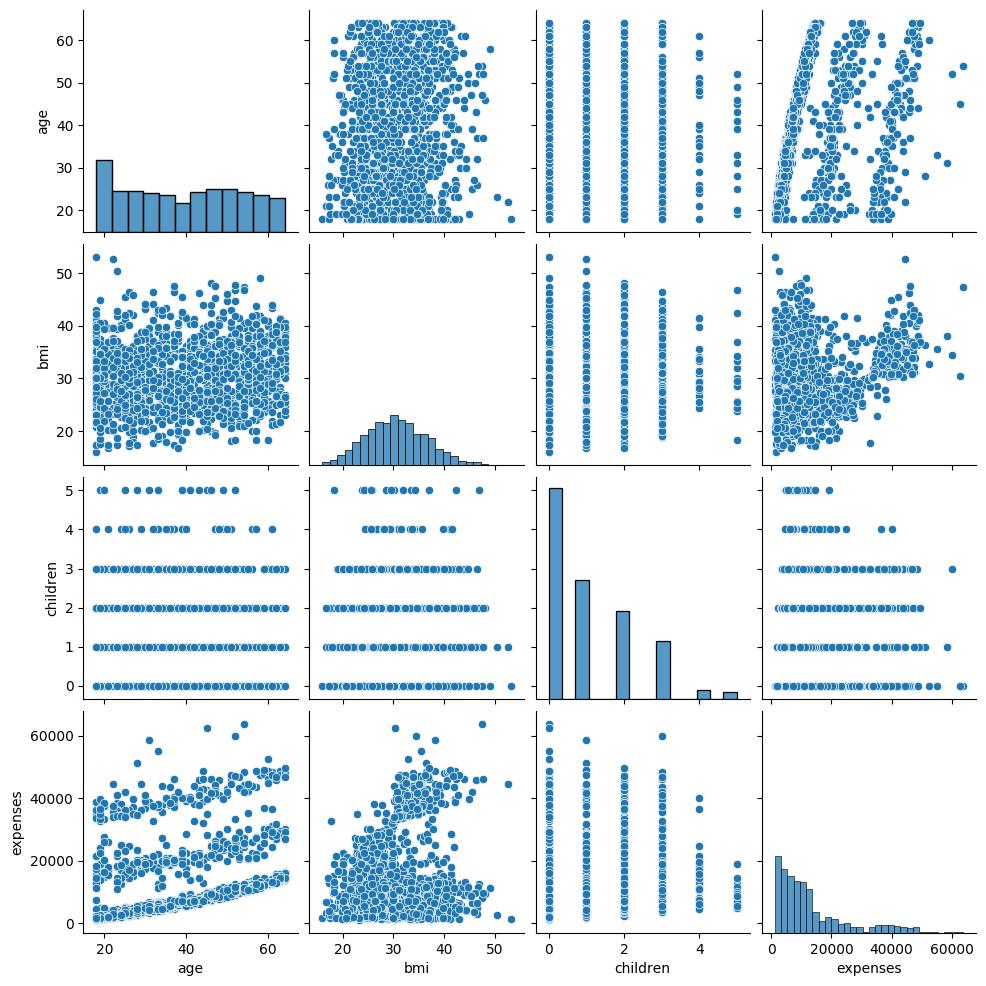

In [22]:
# Explore numerical features
sns.pairplot(df[['age', 'bmi', 'children', 'expenses']])
plt.show()

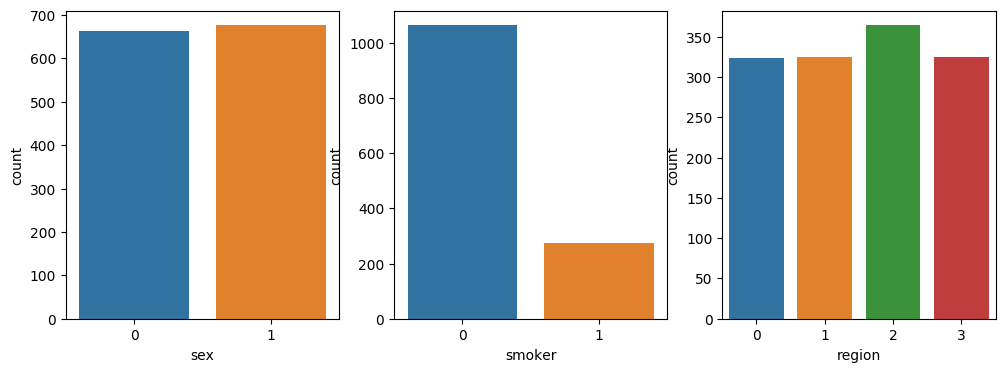

In [23]:
# Explore nominal features
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(x='sex', data=df, ax=ax[0])
sns.countplot(x='smoker', data=df, ax=ax[1])
sns.countplot(x='region', data=df, ax=ax[2])
plt.show()


> Interpretation of Scatter Plot.
- We can see if there is a general relationship between age and medical expenses, and whether this relationship is different for smokers and non-smokers. Scatter plots can be a useful tool for exploring the relationship between two numerical variables, especially when there are other features that may affect the relationship, such as smoking status in this example.



> Interpretation of Box Plot.

- The x-axis of the boxplot represents the number of children, and the y-axis represents the medical expenses. The box in the middle of the plot represents the interquartile range (IQR), which is the range of values between the 25th and 75th percentile of the data. The line inside the box represents the median.

- The whiskers that extend from the box represent the range of the data, excluding any outliers. Outliers are represented as individual points beyond the whiskers.

- By using the x parameter to specify the 'children' feature and the y parameter to specify the 'expenses' feature, we can see how the median and range of medical expenses vary with the number of children a person has. This can help identify any patterns or trends in the data, such as whether medical expenses tend to be higher for people with more children.

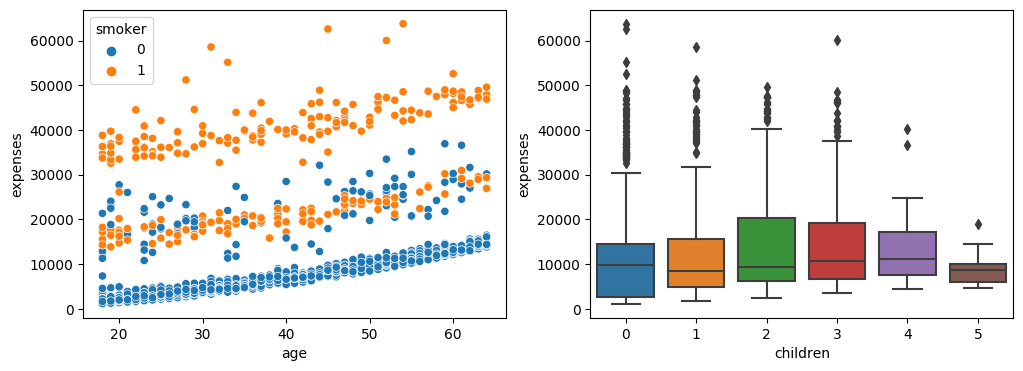

In [24]:
# Explore relationships between features
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df, ax=ax[0])
sns.boxplot(x='children', y='expenses', data=df, ax=ax[1])
plt.show()

#### 4. Model Selection

> Note - If the cost of overestimating the target variable is different from the cost of underestimating it, then one may want to use MAE instead of MSE.

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded2.drop('expenses', axis=1), df_encoded2['expenses'], test_size=0.2, random_state=42)


In [27]:
# Train and evaluate linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
print("Linear Regression - MSE: {:.4f}, MAE: {:.4f}".format(lr_mse, lr_mae))


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Linear Regression - MSE: 0.2303, MAE: 0.3458


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [28]:
# Train and evaluate decision tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
print("Decision Tree - MSE: {:.4f}, MAE: {:.4f}".format(dt_mse, dt_mae))


Decision Tree - MSE: 0.2835, MAE: 0.2528


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [29]:
# Train and evaluate random forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest - MSE: {:.4f}, MAE: {:.4f}".format(rf_mse, rf_mae))


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Random Forest - MSE: 0.1385, MAE: 0.2028


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [30]:
# Train and evaluate neural network model
nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_mae = mean_absolute_error(y_test, nn_pred)
print("Neural Network - MSE: {:.4f}, MAE: {:.4f}".format(nn_mse, nn_mae))


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Neural Network - MSE: 0.1485, MAE: 0.2496


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
